In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import datetime as dt
from datetime import timedelta

In [18]:
dataset = pd.read_csv('inn.csv',index_col=[0],parse_dates=[0],squeeze = True)
dropped = ['total_cases','total_deaths','new_deaths','new_tests','population','population_density','median_age','gdp_per_capita',
           'extreme_poverty','diabetes_prevalence','life_expectancy',
           'day','month','year','quarter','half','bimonth', 'cod_continent','prev_cases','prev_deaths','cod_location','date_id','cvd_death_rate']
loc_id = 35
dataset = dataset[dataset['cod_location'] == loc_id]
dataset.drop(dropped,inplace=True,axis=1)
last_dt = pd.to_datetime(dataset['date'].iloc[-1])
dataset.set_index('date')

,new_cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-06-29,218.0
2020-06-30,668.0
2020-07-01,286.0


In [19]:
type(dataset)
series_value = dataset.values
last_dt

Timestamp('2020-07-03 00:00:00')

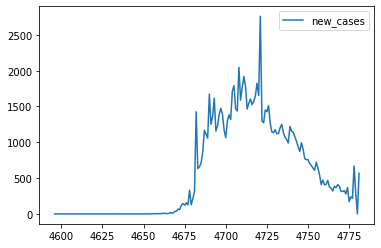

In [20]:
dataset.plot()

In [21]:
f_new_cases = dataset.rolling(window = 20).mean()

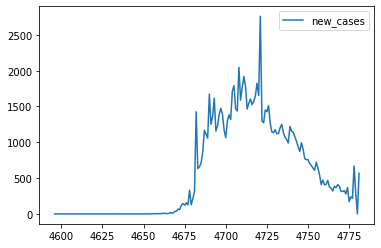

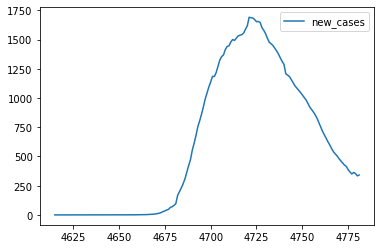

In [22]:
f_new_cases = f_new_cases[0:365]
dataset.plot()
f_new_cases.plot()

In [23]:
value = pd.DataFrame(series_value)
new_df = pd.concat([value, value.shift(-1)],axis=1)
new_df.columns = ['del','Actual','del1','Forecast']
dela = ['del','del1']
new_df.drop(dela,inplace=True,axis=1)
new_df.head()

,Actual,Forecast
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
test = new_df[:1]
test = test.fillna(0)
error = mean_squared_error(test.Actual,test.Forecast)

In [25]:
train = f_new_cases[0:330]
train = train.fillna(0)
test = f_new_cases[330:365]

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(2,1,3))

C:\Users\FahmeDX\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\FahmeDX\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
model_fit = model.fit()
forecast = model_fit.forecast(steps = 10)[0]
column_names = ["date_id", "cd_local", "date", "pred_val"]
predicted = pd.DataFrame(columns = column_names)

In [28]:
forecast
for x in range(0,10):
    new_row = {'date':last_dt + timedelta(x + 1), 'pred_val':forecast[x], 'cd_local': loc_id}
    #append row to the dataframe
    predicted = predicted.append(new_row, ignore_index=True)

In [29]:
predicted['day'] = predicted['date'].dt.day
predicted['month'] = predicted['date'].dt.month
predicted['year'] = predicted['date'].dt.year
predicted.loc[predicted['month'] < 10, 'month'] = '0' + predicted['month'].map(str)
predicted.loc[predicted['day'] < 10, 'day'] = '0' + predicted['day'].map(str)
predicted['date_id'] = predicted['year'].map(str) + predicted['month'].map(str) + predicted['day'].map(str)
droppd = ['day','month','year','date']
predicted.drop(droppd,inplace=True,axis=1)
predicted.set_index('date_id')

,cd_local,pred_val
date_id,,
20200704,35,340.833414
20200705,35,337.838667
20200706,35,336.720691
20200707,35,336.280573
20200708,35,336.109850
20200709,35,336.068350
20200710,35,336.107002
20200711,35,336.207709
20200712,35,336.362944


In [30]:
predicted.to_csv('predict.csv')